In [1]:
import pandas as pd
import nltk
df = pd.read_csv("french_preprocess_list_jorg.csv")
df.head()

,label,text
0,SH16,gaine compléter rappel
1,CAR23,métallique toit cabine correctement
2,CAR26,plaque identification complète correcte charge...
3,CAR01,bon fonctionnement système appel secours cabin...
4,CAR06,donnée propriétaire placer cabine


In [2]:
from io import StringIO
col = ['label', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]
df.columns = ['label', 'text']
df['label_id'] = df['label'].factorize()[0]
label_id_df = df[['label', 'label_id']].drop_duplicates().sort_values('label_id')
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id', 'label']].values)
all_labels = df[['label', 'label_id']]
df.head()
#all_labels.to_csv("./Post_Data/all_labels2.csv", index=False)

,label,text,label_id
0,SH16,gaine compléter rappel,0
1,CAR23,métallique toit cabine correctement,1
2,CAR26,plaque identification complète correcte charge...,2
3,CAR01,bon fonctionnement système appel secours cabin...,3
4,CAR06,donnée propriétaire placer cabine,4


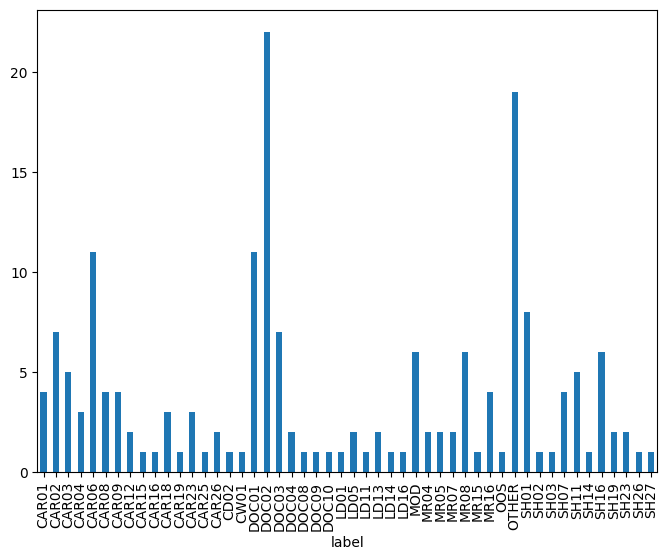

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.text).toarray()
labels = df.label_id
features.shape

(182, 248)

In [5]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for text, label_id in sorted(label_to_id.items()):
  features_chi2 = chi2(features, labels == label_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(text))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'CAR01':
  . Most correlated unigrams:
. bon
. système
  . Most correlated bigrams:
. secours cabine
. bon fonctionnement
# 'CAR02':
  . Most correlated unigrams:
. installation
. sans
  . Most correlated bigrams:
. tension appel
. sans tension
# 'CAR03':
  . Most correlated unigrams:
. après
. secours
  . Most correlated bigrams:
. pendant test
. éclairage secours
# 'CAR04':
  . Most correlated unigrams:
. numéro
. identification
  . Most correlated bigrams:
. entretien nom
. identification complète
# 'CAR06':
  . Most correlated unigrams:
. donnée
. propriétaire
  . Most correlated bigrams:
. donnée propriétaire
. propriétaire placer
# 'CAR08':
  . Most correlated unigrams:
. remplacer
. éclairage
  . Most correlated bigrams:
. dossier sécurité
. défectueux remédier
# 'CAR09':
  . Most correlated unigrams:
. inspection
. commande
  . Most correlated bigrams:
. dossier sécurité
. toit cabine
# 'CAR12':
  . Most correlated unigrams:
. rappel
. remédier
  . Most correlated bigrams:
. 

/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/de

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


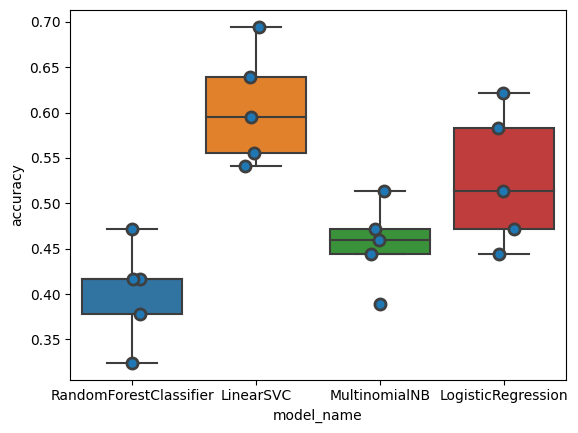

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [8]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.604805
LogisticRegression        0.527027
MultinomialNB             0.455706
RandomForestClassifier    0.401652
Name: accuracy, dtype: float64

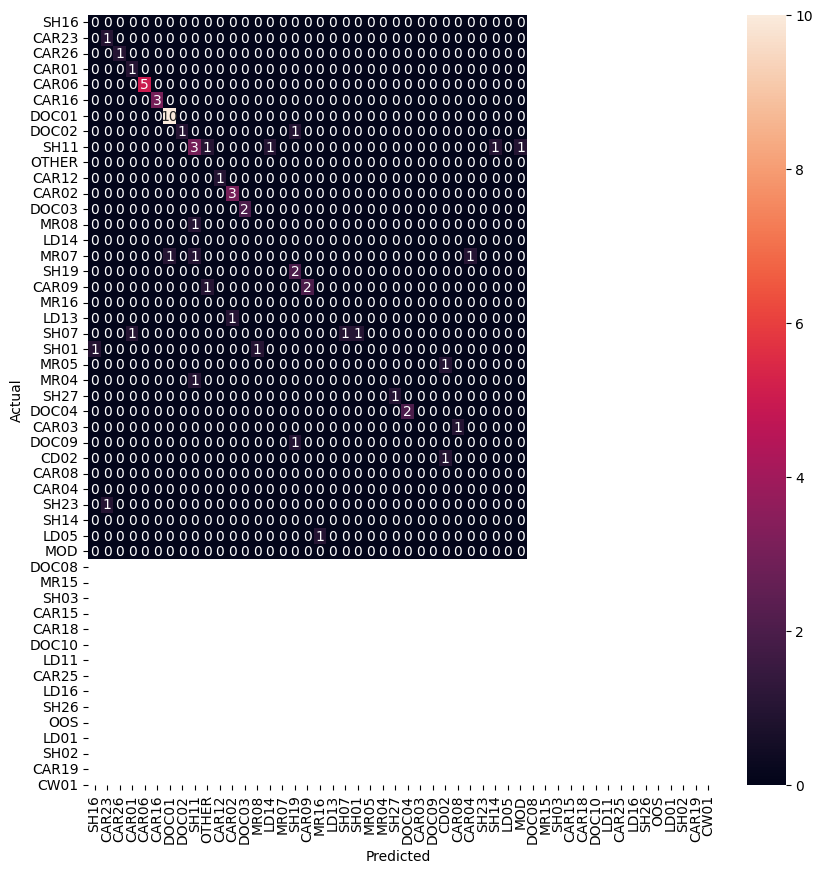

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [10]:
model.fit(features, labels)

LinearSVC()

In [11]:
from sklearn.feature_selection import chi2

N = 2
for label, label_id in sorted(label_to_id.items()):
  indices = np.argsort(model.coef_[label_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(label))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'CAR01':
  . Top unigrams:
       . système
       . bon
  . Top bigrams:
       . bon fonctionnement
       . resté sans
# 'CAR02':
  . Top unigrams:
       . sans
       . appel
  . Top bigrams:
       . installation sans
       . tension appel
# 'CAR03':
  . Top unigrams:
       . secours
       . après
  . Top bigrams:
       . éclairage secours
       . pendant test
# 'CAR04':
  . Top unigrams:
       . identification
       . numéro
  . Top bigrams:
       . nom responsable
       . complète correcte
# 'CAR06':
  . Top unigrams:
       . propriétaire
       . donnée
  . Top bigrams:
       . coordonnée responsable
       . donnée propriétaire
# 'CAR08':
  . Top unigrams:
       . cabine
       . remplacer
  . Top bigrams:
       . défectueux remédier
       . rapport analyse
# 'CAR09':
  . Top unigrams:
       . commande
       . inspection
  . Top bigrams:
       . toit cabine
       . arrêté royal
# 'CAR12':
  . Top unigrams:
       . rappel
       . remédier
  . Top bigrams:

/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('./Post_Data/Testing_data.csv')
all_labels = pd.read_csv('./Post_Data/all_labels2.csv')

print(df)
texts = df['text']
text_features = tfidf.transform(df['text'])
predictions = model.predict(text_features)
df3 = pd.DataFrame()

for text, predicted in zip(texts, predictions):
    code = all_labels[all_labels['label_id'] == predicted]['label'].iloc[0]
    dict = {'label': code, 'text': text}
    df2 = pd.DataFrame(data=dict, index=[0])
    df3 = pd.concat([df3, df2], ignore_index=True)
    
df3.to_csv('./Post_Data/Output3.csv', index=False)



     label                                               text
0     CD06                     zone porte fonctionne remédier
1    OTHER                                enlever autocollant
2     LD05                                   permanent rappel
3    DOC01  manque attestation régularisation dossier sécu...
4    CAR16  test parachute fonctionne enclenchement bobine...
..     ...                                                ...
185   MR04              ouverture manuelle frein hors service
186   SH23  bruit vibration moteur faire contrôler service...
187  DOC09   procédure appel urgence placer cabine répétition
188  DOC10  instruction libération secours manquant sans s...
189   LD01  contact fermeture interrompt déplacement cabin...

[190 rows x 2 columns]


In [13]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3
           7       0.91      1.00      0.95        10
           8       1.00      0.50      0.67         2
           9       0.50      0.43      0.46         7
          10       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         1
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         3
          20       0.50      1.00      0.67         2
          21       1.00    

/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Jorg/miniconda3/envs/NLP-ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Us